In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import re
import math as ma

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

get_ipython().run_line_magic('matplotlib', 'inline')

In [97]:
def days_prior(df: pd.DataFrame, days: int, time_frame: int = 0) -> pd.DataFrame:

    epoch = len(df.index) - ma.floor(days)

    if time_frame == 0.0:

        return df[(df.index >= epoch)]

    else:
        
        end = epoch + ma.floor(time_frame)

        return df[(df.index >= epoch) & (df.index < end)]

def get_csv(path: str):

    df = pd\
        .read_csv(path, parse_dates = ['Date'])\
        .drop(columns = ['Currency', '24h Open (USD)', '24h High (USD)', '24h Low (USD)'])\
        .rename(columns = {'Date': 'date', 'Closing Price (USD)': 'price'})

    return df


In [98]:
df_eth  = get_csv('../data/Ethereum.csv')
df_ada  = get_csv('../data/Cardano.csv')
df_doge = get_csv('../data/Dogecoin.csv')
df_sol  = get_csv('../data/Solana.csv')

In [99]:
# Augmented Dickey Fuller Test (ADF Test)
# p-value should be << 0.05

result = adfuller(df_ada.set_index('date'))

print(f'p-value: {result[1]}')

p-value: 0.9801438610961031


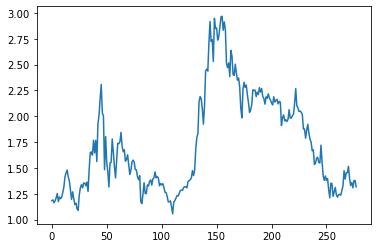

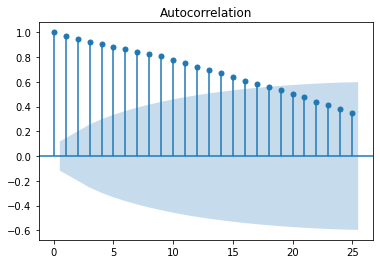

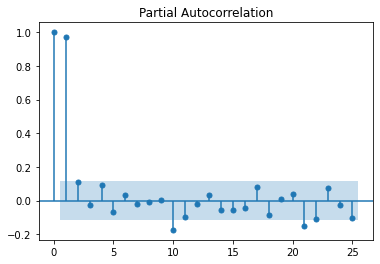

In [101]:
# Original Series
plt.figure()
plt.plot(df_ada[['price']])
plot_acf(df_ada[['price']])
plot_pacf(df_ada[['price']])
plt.show()

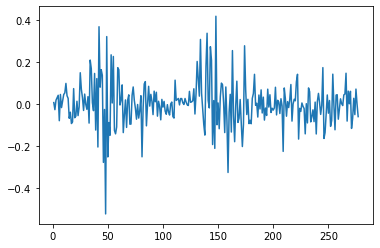

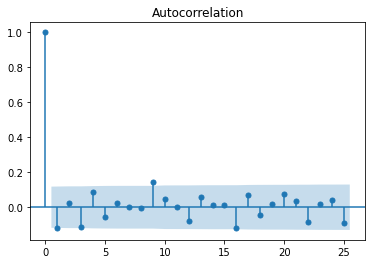

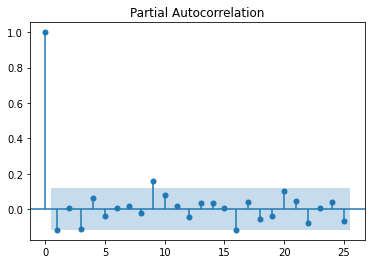

In [102]:
# 1st Differencing
plt.figure()
plt.plot(df_ada[['price']].diff().dropna(), label = '1st Differencing')
plot_acf(df_ada[['price']].diff().dropna())
plot_pacf(df_ada[['price']].diff().dropna())
plt.show()

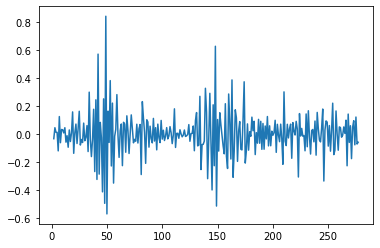

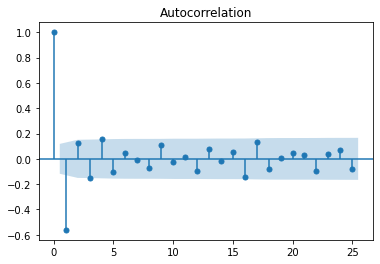

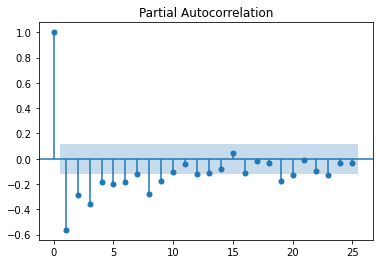

In [103]:
# 2nd Differencing
plt.figure()
plt.plot(df_ada[['price']].diff().diff().dropna(), label = '1st Differencing')
plot_acf(df_ada[['price']].diff().diff().dropna())
plot_pacf(df_ada[['price']].diff().diff().dropna())
plt.show()